In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [6]:
folder_path = '../data'
datasets = [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]

In [7]:
def plot(dataset):
    datasize = pd.read_csv('../data/' + dataset + '/targets.csv').shape[0]

    # Load the CSV file
    df = pd.read_csv('../loss_csvs/' + dataset + '.csv')

    # Group by 'method' and calculate the mean and standard deviation of 'loss'
    grouped = df.groupby('method')['loss'].agg(['mean', 'std'])
    
    # Determine colors
    colors = ['red' if method.startswith('mlp') else 'black' for method in grouped.index]

    # Plotting
    plt.figure(figsize=(6, 1.5))

    # Plot mean loss for each method with methods on the y-axis
    for i, method in enumerate(grouped.index):
        plt.errorbar(grouped['mean'].iloc[i], method, xerr=0.1*grouped['std'].iloc[i], fmt='o', color=colors[i], capsize=5, capthick=2, elinewidth=2, linestyle='none')

    # Add labels and title
    plt.ylabel('Method')
    plt.xlabel('Loss')
    plt.title('Mean Loss with 1 Standard Deviation: ' + dataset + f"(N = {datasize})")

    # Show grid
    plt.grid(True)

    # Show plot
    plt.tight_layout()
    plt.show()

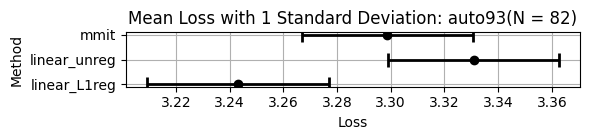

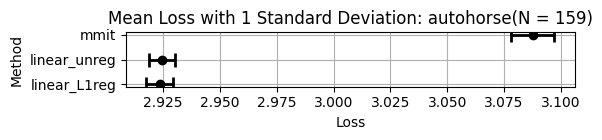

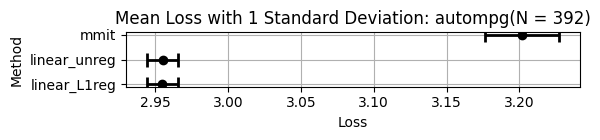

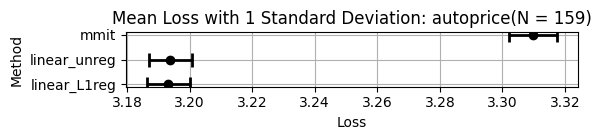

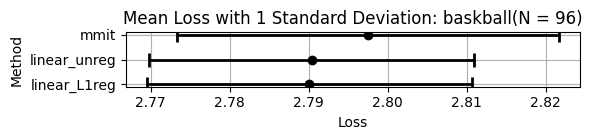

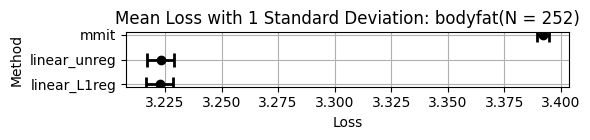

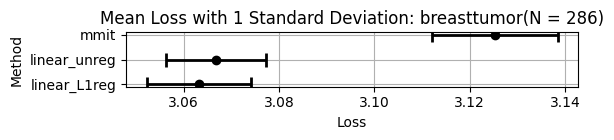

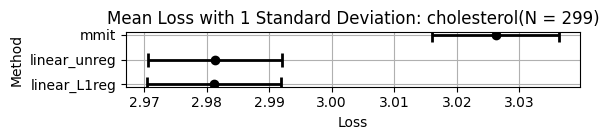

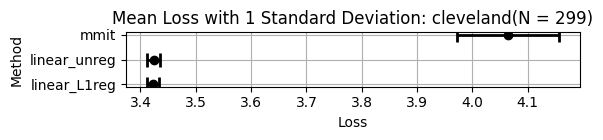

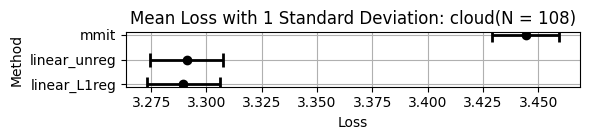

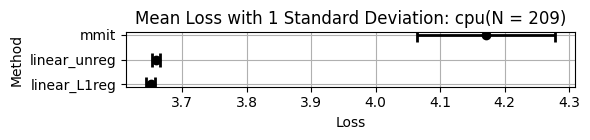

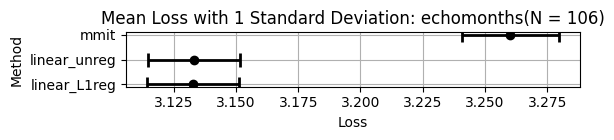

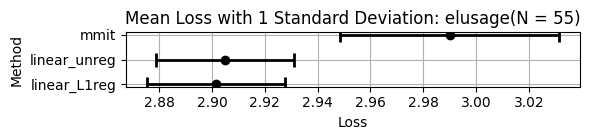

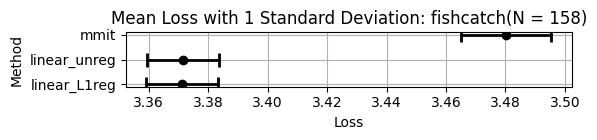

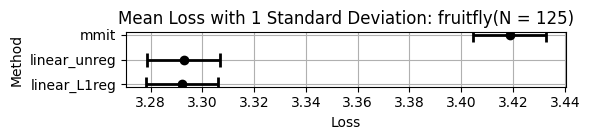

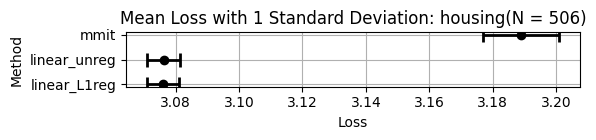

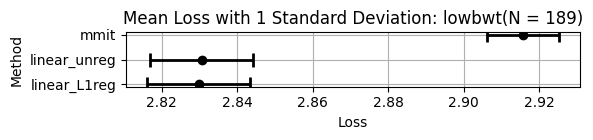

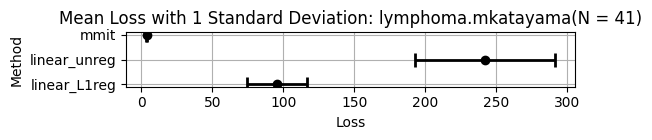

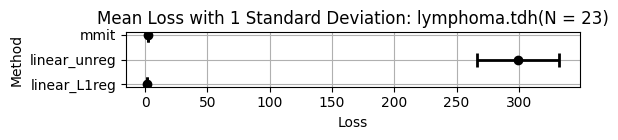

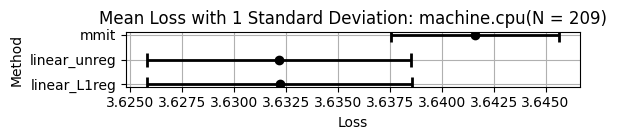

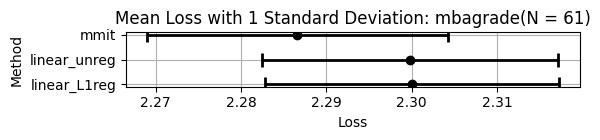

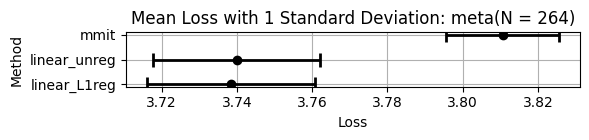

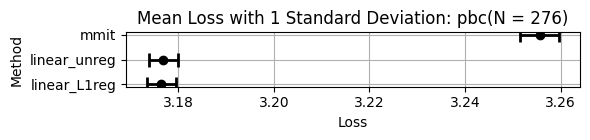

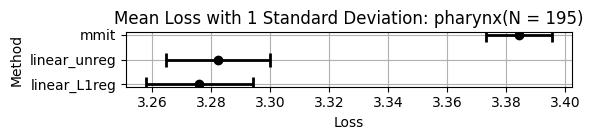

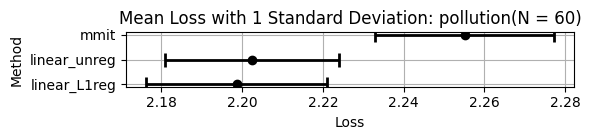

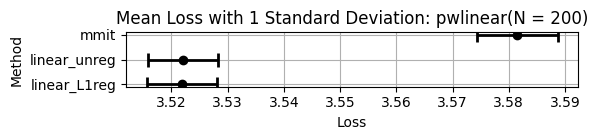

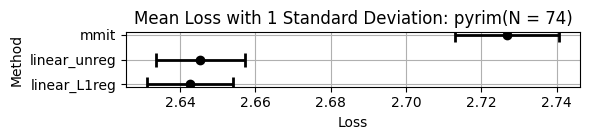

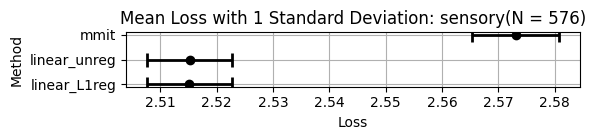

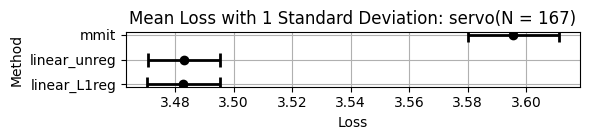

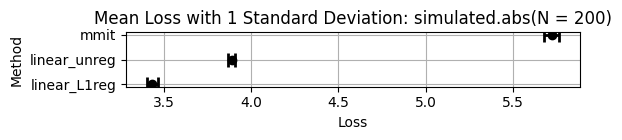

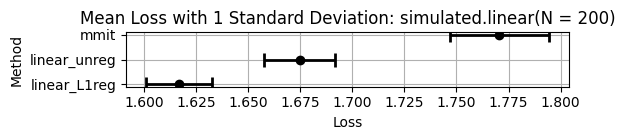

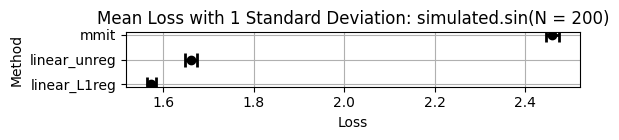

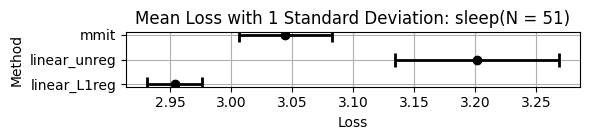

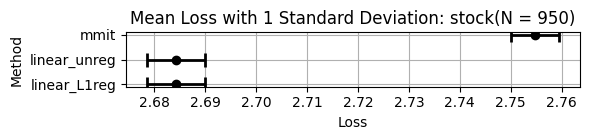

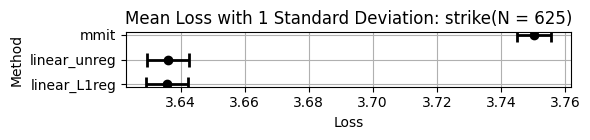

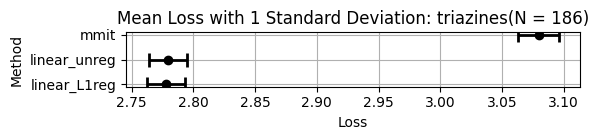

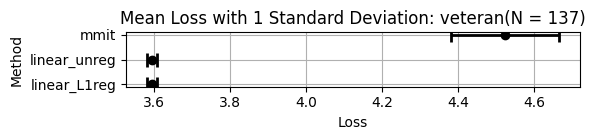

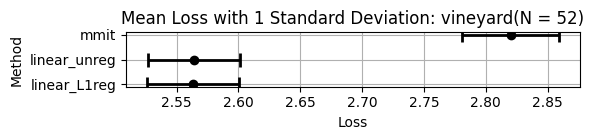

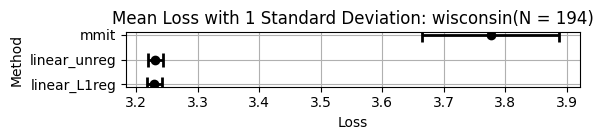

In [8]:
for dataset in datasets:
    plot(dataset)